# Рынок заведений общественного питания Москвы

## Описание проекта
- Вы решили открыть небольшое кафе в Москве. Оно оригинальное — гостей должны обслуживать роботы. Проект многообещающий, но дорогой. Вместе с партнёрами вы решились обратиться к инвесторам. Их интересует текущее положение дел на рынке — сможете ли вы снискать популярность на долгое время, когда все зеваки насмотрятся на роботов-официантов?
- Вы — гуру аналитики, и партнёры просят вас подготовить исследование рынка. У вас есть открытые данные о заведениях общественного питания в Москве.

## Описание данных
- Таблица rest_data:
- id — идентификатор объекта;
- object_name — название объекта общественного питания;
- chain — сетевой ресторан;
- object_type — тип объекта общественного питания;
- address — адрес;
- number — количество посадочных мест.


In [2]:
import os
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
from pandas.plotting import register_matplotlib_converters
import warnings
register_matplotlib_converters()

In [3]:
way = 'C:/Users/user/Downloads/'
try:
    rest_data = pd.read_csv(way+'rest_data.csv')
except:
    rest_data = pd.read_csv('/datasets/rest_data.csv')

<div style="background:#d4d6fa; color:#000; padding:10px">
    
загружаем файлы при необходимости можно заменить путь к файлу 'way'

In [4]:
mos = pd.read_csv('https://frs.noosphere.ru/xmlui/bitstream/handle/20.500.11925/714058/mosgaz-streets.csv')
mos = mos.rename(columns= {'streetname': 'street'})

In [5]:
mos.head()

,street,areaid,okrug,area
0,Выставочный переулок,17,ЦАО,Пресненский район
1,улица Гашека,17,ЦАО,Пресненский район
2,Большая Никитская улица,17,ЦАО,Пресненский район
3,Глубокий переулок,17,ЦАО,Пресненский район
4,Большой Гнездниковский переулок,17,ЦАО,Пресненский район


<div style="background:#d4d6fa; color:#000; padding:10px">

возьмем из внешнего источника соответствие улиц районов и округов

In [6]:
rest_data.head()

,id,object_name,chain,object_type,address,number
0,151635,СМЕТАНА,нет,кафе,"город Москва, улица Егора Абакумова, дом 9",48
1,77874,Родник,нет,кафе,"город Москва, улица Талалихина, дом 2/1, корпус 1",35
2,24309,Кафе «Академия»,нет,кафе,"город Москва, Абельмановская улица, дом 6",95
3,21894,ПИЦЦЕТОРИЯ,да,кафе,"город Москва, Абрамцевская улица, дом 1",40
4,119365,Кафе «Вишневая метель»,нет,кафе,"город Москва, Абрамцевская улица, дом 9, корпус 1",50


In [7]:
rest_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15366 entries, 0 to 15365
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   id           15366 non-null  int64 
 1   object_name  15366 non-null  object
 2   chain        15366 non-null  object
 3   object_type  15366 non-null  object
 4   address      15366 non-null  object
 5   number       15366 non-null  int64 
dtypes: int64(2), object(4)
memory usage: 720.4+ KB


In [8]:
rest_data['object_name'] = rest_data['object_name'].str.lower()

In [9]:
print('количество дубликатов rest_data:' , rest_data.duplicated().sum())

количество дубликатов rest_data: 0


In [10]:
rest_data.isna().sum() #проверим пропуски

id             0
object_name    0
chain          0
object_type    0
address        0
number         0
dtype: int64

In [11]:
rest_data.groupby('object_name')['id'].count().sort_values(ascending=False).reset_index().head(10)

,object_name,id
0,столовая,321
1,кафе,278
2,шаурма,250
3,шоколадница,158
4,kfc,155
5,макдоналдс,151
6,бургер кинг,137
7,теремок,94
8,крошка картошка,90
9,домино'с пицца,90


<div style="background:#d4d6fa; color:#000; padding:10px">

посмотрели сгрупированную таблицу увидели, что есть различие в написании названий заведений

In [12]:
def new_name(row):
 
    if 'макдоналдс' in row or 'macdonalds' in row or 'mcdonalds' in row:
        return 'macdonalds'
    elif 'кфс' in row or 'kfc' in row:
        return 'kfc'
    elif 'шоколадница' in row:
        return 'шоколадница'
    elif 'бургер кинг' in row or 'burger king' in row:
        return 'burger king'
    elif 'теремок' in row:
        return 'теремок'
    elif 'domino' in row or 'домино' in row and ('pizza' in row or 'пицца' in row):
        return 'dominos pizza'
    elif 'крошка картошка' in row:
        return 'крошка картошка'
    elif ('wok' in row or 'вок' in row) and 'суши' in row:
        return 'суши вок'
    elif 'милти' in row:
        return 'милти'
    elif 'papa jone' in row or 'папа джон' in row:
        return 'papa jones'
    elif ('dodo' in row or 'додо' in row) and ('pizza' in row or 'пицца' in row):
        return 'додо пицца'
    elif 'yakitor' in row or 'якитор' in row:
        return 'якитория'
    elif 'coffee house' in row or 'кофе хауз' in row or 'кофе хаус' in row:
        return 'кофе хаус'
    elif 'subway' in row or 'сабвей' in row or 'сабвэй' in row:
        return 'subway'
    elif 'tanuki' in row or 'тануки' in row:
        return 'тануки'
    elif 'il patio' in row or 'иль патио' in row:
        return 'il patio'
    elif 'cofix' in row or 'кофикс' in row:
        return 'cofix'
    elif 'му му' in row or 'му-му' in row:
        return 'му-му'
    elif 'чайхана' in row:
        return 'чайхона'
    elif 'doner kebab' in row or 'донер кебаб' in row:
        return 'донер кебаб'
    elif 'старбакс' in row:
        return 'starbucks'
    return row
 
rest_data['object_name'] = rest_data['object_name'].apply(new_name)
 

<div style="background:#d4d6fa; color:#000; padding:10px">

создали функцию с заменой названий заведений и применили ее

In [13]:
rest_data.groupby('object_name')['id'].count().sort_values(ascending=False).reset_index().head(10)

,object_name,id
0,столовая,321
1,кафе,278
2,шаурма,250
3,kfc,192
4,шоколадница,189
5,macdonalds,174
6,burger king,161
7,теремок,116
8,dominos pizza,110
9,суши вок,100


<div style="background:#d4d6fa; color:#000; padding:10px">

сново посмотрели на сгрупированные данные теперь более менее 
    

<div class = "alert alert-info" >
    
## Шаг №2. Анализ данных


In [13]:
rest_data.groupby('object_type')['id'].count().sort_values(ascending=False).reset_index()

,object_type,id
0,кафе,6099
1,столовая,2587
2,ресторан,2285
3,предприятие быстрого обслуживания,1923
4,бар,856
5,буфет,585
6,кафетерий,398
7,закусочная,360
8,магазин (отдел кулинарии),273


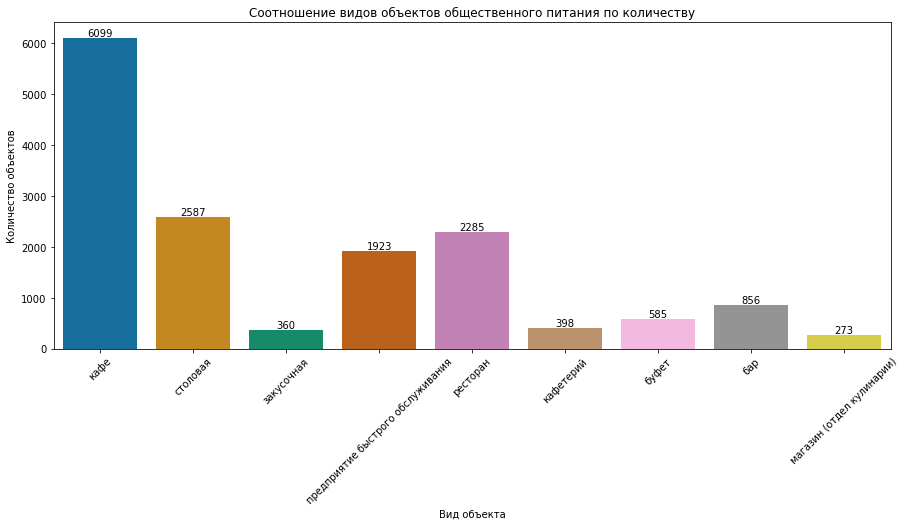

In [14]:
plt.figure(figsize=(15, 6))
ax = sns.barplot(x='object_type', y='id', data=rest_data, palette='colorblind', errwidth=0, estimator=len)
plt.xticks(rotation=45)
plt.xticks()
plt.xlabel('Вид объекта')
plt.ylabel('Количество объектов')
plt.title('Cоотношение видов объектов общественного питания по количеству')
ax.bar_label(ax.containers[0])
plt.show()

<div style="background:#d4d6fa; color:#000; padding:10px">


в Москве преобладают кафе что хорошо видно на графике на втором и третьем месте столовые и рестораны, в связи с этим будет большая конкуренция по кафе

In [15]:
network = rest_data.groupby('chain')['id'].count().sort_values(ascending=False).reset_index()
network

,chain,id
0,нет,12398
1,да,2968


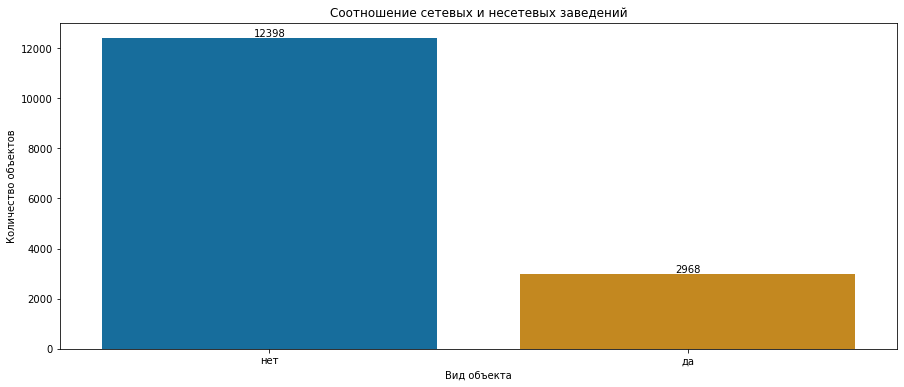

In [16]:
plt.figure(figsize=(15, 6))
ax = sns.barplot(x='chain', y='id', data=rest_data, palette='colorblind', errwidth=0, estimator=len)
plt.xticks()
plt.xlabel('Вид объекта')
plt.ylabel('Количество объектов')
plt.title('Cоотношение сетевых и несетевых заведений')
ax.bar_label(ax.containers[0])
plt.show()

In [17]:
print('% сетевых заведений в Москве: '"{:.0%}".format(network['id'][1] / network['id'].sum()))

% сетевых заведений в Москве: 19%


<div style="background:#d4d6fa; color:#000; padding:10px">

значительно преобладают несетевые заведения, сетевых от общего количества всего 19% 

In [18]:
rest_object_1 = rest_data.pivot_table(index='object_type', columns='chain', values='id', aggfunc='count')
rest_object_1['ratio_object'] = rest_object_1['да']/(rest_object_1['да']+rest_object_1['нет'])*100
display(rest_object_1)

chain,да,нет,ratio_object
object_type,,,
бар,37,819,4.322430
буфет,11,574,1.880342
закусочная,56,304,15.555556
кафе,1396,4703,22.888998
кафетерий,52,346,13.065327
магазин (отдел кулинарии),78,195,28.571429
предприятие быстрого обслуживания,791,1132,41.133645
ресторан,544,1741,23.807440
столовая,3,2584,0.115964


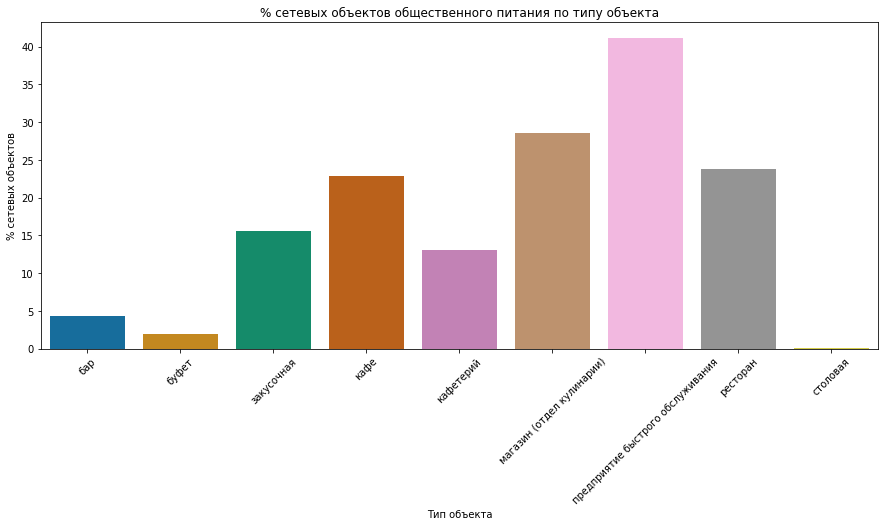

In [19]:
plt.figure(figsize=(15,6))
ax = sns.barplot(x=rest_object_1.index, y='ratio_object', data=rest_object_1, palette='colorblind', errwidth=0)
plt.xticks(rotation=45)
plt.xticks()
plt.xlabel('Тип объекта')
plt.ylabel('% сетевых объектов')
plt.title('% сетевых объектов общественного питания по типу объекта')
plt.show()

<div style="background:#d4d6fa; color:#000; padding:10px">

предприятия быстрого обслуживания почти половина сетевых, а вот сетевых столовых практически нет

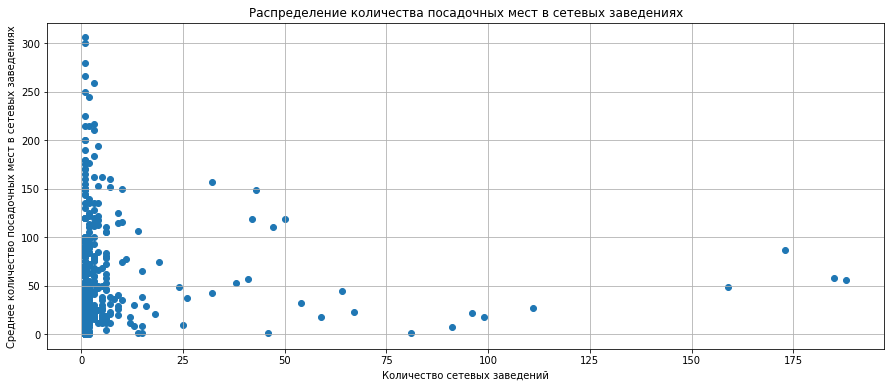

In [20]:
rest_number_all = rest_data[rest_data['chain'] == 'да']
rest_number_all = rest_number_all.groupby('object_name').agg({'number':'nunique','number':['count', 'mean']}).reset_index()
rest_number_all.columns = rest_number_all.columns.get_level_values(1)
plt.figure(figsize=(15,6))
plt.scatter(x='count', y='mean', data=rest_number_all)
plt.xticks()
plt.grid()
plt.xlabel('Количество сетевых заведений')
plt.ylabel('Среднее количество посадочных мест в сетевых заведениях')
plt.title('Распределение количества посадочных мест в сетевых заведениях')
plt.show()

<div style="background:#d4d6fa; color:#000; padding:10px">

при малом количестве заведений в сети увеличивается число посадочных мест, а вот с ростом количество заведений посадочные места не привышаю отметки в 90 мест  

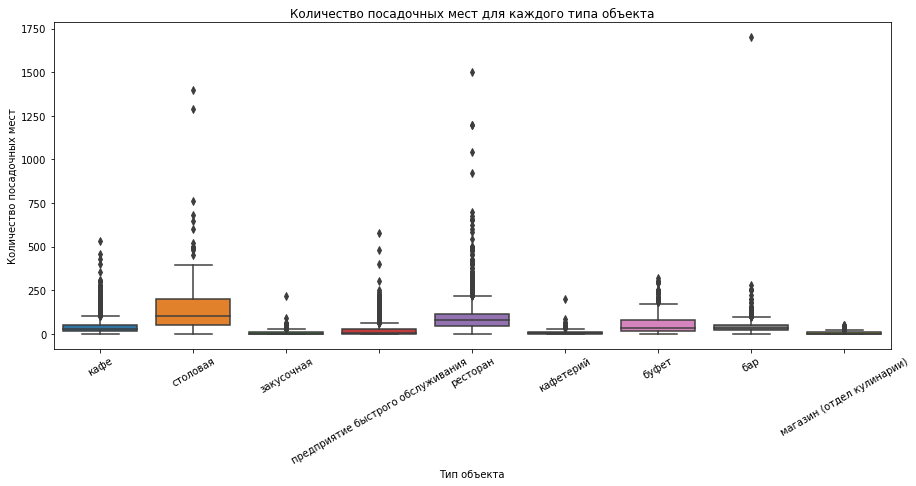

In [21]:
plt.figure(figsize=(15, 6))
sns.boxplot(x=rest_data['object_type'], y=rest_data['number'])
plt.xticks(rotation=30)
plt.xticks()
plt.xlabel('Тип объекта')
plt.ylabel('Количество посадочных мест')
plt.title('Количество посадочных мест для каждого типа объекта')
plt.show()

In [22]:
rest_number = rest_data.groupby('object_type')['number'].mean().sort_values(ascending=False).reset_index()
rest_number = rest_number.astype({"number": "int64"})
rest_number

,object_type,number
0,столовая,130
1,ресторан,96
2,буфет,51
3,бар,43
4,кафе,39
5,предприятие быстрого обслуживания,20
6,кафетерий,9
7,закусочная,7
8,магазин (отдел кулинарии),5


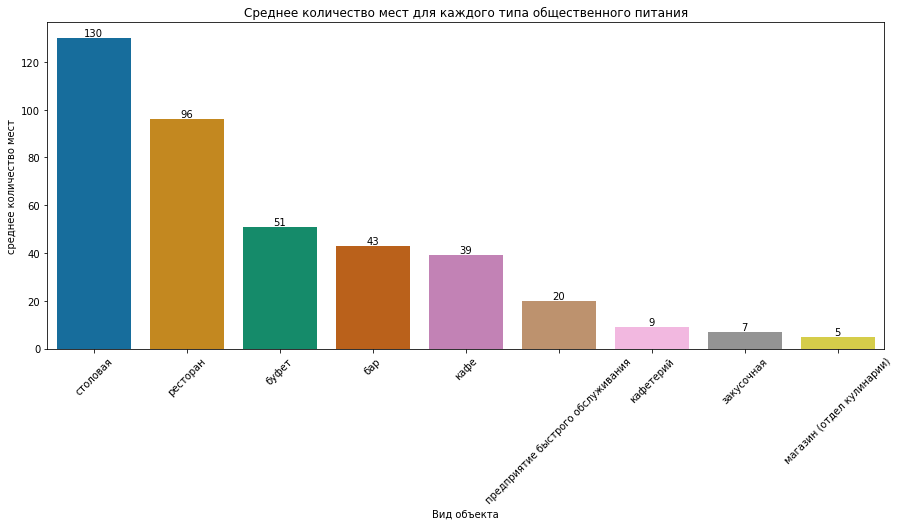

In [23]:
plt.figure(figsize=(15, 6))
ax = sns.barplot(x='object_type', y='number', data=rest_number, palette='colorblind', errwidth=0)
plt.xticks(rotation=45)
plt.xticks()
plt.xlabel('Вид объекта')
plt.ylabel('среднее количество мест')
plt.title('Среднее количество мест для каждого типа общественного питания')
ax.bar_label(ax.containers[0])
plt.show()

<div style="background:#d4d6fa; color:#000; padding:10px">

Самое большое среднее количество мест предоставляют столовые, на втором месте по количеству мест рестораны. 
    
Кафетерии, закусочные и магазины(отделы кулинарии) практически не располагают посадочными местами

но имеются и выбросы где в столовых ресторанах и барах больше 1500 мест (что сомнительно особенно по кафе)

In [24]:
street_def = ['улица', 'проезд', 'бульвар', 'шоссе', 'переулок', 'проспект', 'набережная', 'площадь', 'аллея', 'зеленоград', 'парк']

def get_street(row):
    for e in row.split(','):
        for i in street_def:
            if i in e.lower():
                return e
rest_data['street'] = rest_data['address'].apply(get_street)
rest_data['street'] = rest_data['street'].str.strip()
rest_data.head()

,id,object_name,chain,object_type,address,number,street
0,151635,сметана,нет,кафе,"город Москва, улица Егора Абакумова, дом 9",48,улица Егора Абакумова
1,77874,родник,нет,кафе,"город Москва, улица Талалихина, дом 2/1, корпус 1",35,улица Талалихина
2,24309,кафе «академия»,нет,кафе,"город Москва, Абельмановская улица, дом 6",95,Абельмановская улица
3,21894,пиццетория,да,кафе,"город Москва, Абрамцевская улица, дом 1",40,Абрамцевская улица
4,119365,кафе «вишневая метель»,нет,кафе,"город Москва, Абрамцевская улица, дом 9, корпус 1",50,Абрамцевская улица


In [25]:
rest_data.isna().sum()

id               0
object_name      0
chain            0
object_type      0
address          0
number           0
street         286
dtype: int64

<div style="background:#d4d6fa; color:#000; padding:10px">

выбрали улици, бульвары, шоссе и тд по итогу потеряли 286 улиц с адресами, из общий массы некретично и в дальнейшем на показатель не повлият

In [26]:
top_10_street = rest_data.groupby('street')['id'].count().sort_values(ascending=False).reset_index().head(10)
top_10_street

,street,id
0,город Зеленоград,232
1,проспект Мира,204
2,Профсоюзная улица,183
3,Ленинградский проспект,173
4,Пресненская набережная,167
5,Варшавское шоссе,165
6,Ленинский проспект,148
7,проспект Вернадского,132
8,Кутузовский проспект,114
9,Каширское шоссе,112


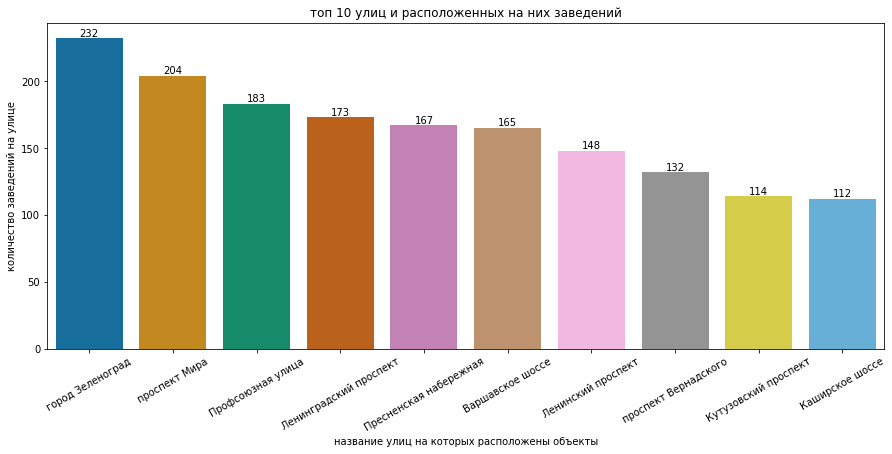

In [27]:
plt.figure(figsize=(15, 6))
ax = sns.barplot(x='street', y='id', data=top_10_street, palette='colorblind', errwidth=0)
plt.xticks(rotation=30)
plt.xticks()
plt.xlabel('название улиц на которых расположены объекты')
plt.ylabel('количество заведений на улице')
plt.title('топ 10 улиц и расположенных на них заведений')
ax.bar_label(ax.containers[0])
plt.show()

In [28]:
top_10_street_area = top_10_street.merge(mos, on='street', how='left')
top_10_street_area = top_10_street_area.groupby('street').agg({'area': 'first'})
top_10_street_area

,area
street,
Варшавское шоссе,Район Чертаново Центральное
Каширское шоссе,Район Москворечье-Сабурово
Кутузовский проспект,Район Дорогомилово
Ленинградский проспект,Район Аэропорт
Ленинский проспект,Район Проспект Вернадского
Пресненская набережная,Пресненский район
Профсоюзная улица,Академический район
город Зеленоград,Район Крюково
проспект Вернадского,Район Проспект Вернадского


<div style="background:#d4d6fa; color:#000; padding:10px">

отсортировали посчитали добавили внешний источник увидели следующие районы соотносительно улицам, 
    
можно сказать, что все это довольно не верно, так как 1 улица может расположиться на нескольких районах, одно можно сказать точно что Пресненская набережная точно только в Пресненском районе

In [29]:
street_1 = rest_data.groupby('street')['id'].count().sort_values(ascending=False).reset_index()
street_1 = street_1[street_1['id'] == 1]
street_1

,street,id
1329,Армейская улица,1
1330,улица Инессы Арманд,1
1331,Ащеулов переулок,1
1332,2-я Барышевская улица,1
1333,Армавирская улица,1
...,...,...
1859,Зарайская улица,1
1860,Якиманский переулок,1
1861,Ялтинская улица,1
1862,Янтарный проезд,1


In [30]:
area_one_object = street_1.merge(mos, on='street', how='left')
area_one_object.head()

,street,id,areaid,okrug,area
0,Армейская улица,1,NaN,NaN,NaN
1,улица Инессы Арманд,1,134.0,ЮЗАО,Район Ясенево
2,Ащеулов переулок,1,15.0,ЦАО,Красносельский район
3,2-я Барышевская улица,1,NaN,NaN,NaN
4,Армавирская улица,1,115.0,ЮВАО,Район Люблино


In [31]:
area_one_object.isna().sum()

street     0
id         0
areaid    33
okrug     33
area      33
dtype: int64

In [32]:
area_one_objec = area_one_object.groupby('area')['id'].count().sort_values(ascending=False).reset_index().head(20)
area_one_objec

,area,id
0,Район Хамовники,26
1,Таганский район,25
2,Басманный район,24
3,Тверской район,20
4,Пресненский район,19
5,Район Арбат,18
6,Район Марьина роща,18
7,Мещанский район,16
8,Район Замоскворечье,14
9,Район Лефортово,12


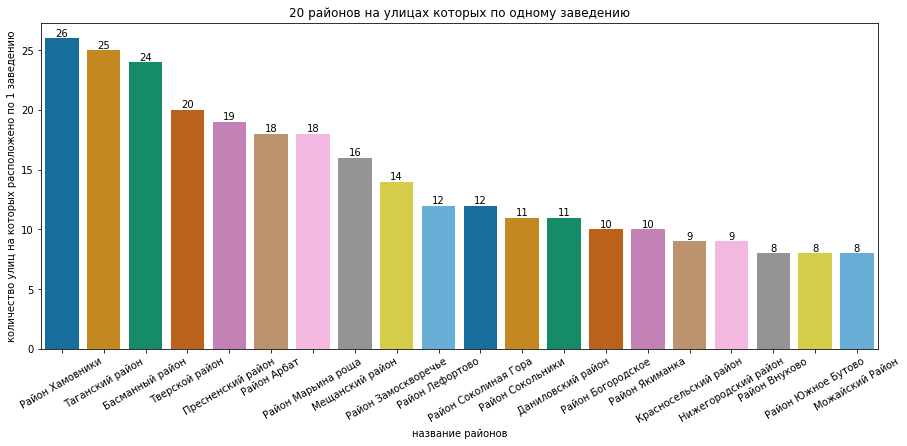

In [33]:
plt.figure(figsize=(15, 6))
ax = sns.barplot(x='area', y='id', data=area_one_objec, palette='colorblind', errwidth=0)
plt.xticks(rotation=30)
plt.xticks()
plt.xlabel('название районов')
plt.ylabel('количество улиц на которых расположено по 1 заведению')
plt.title('20 районов на улицах которых по одному заведению')
ax.bar_label(ax.containers[0])
plt.show()

<div style="background:#d4d6fa; color:#000; padding:10px">

больше всего улиц на которых расположен всего 1 объект общественного питания в районе Хамовники также в лидерах Таганский и Басманный районы

In [34]:
top_10_street

,street,id
0,город Зеленоград,232
1,проспект Мира,204
2,Профсоюзная улица,183
3,Ленинградский проспект,173
4,Пресненская набережная,167
5,Варшавское шоссе,165
6,Ленинский проспект,148
7,проспект Вернадского,132
8,Кутузовский проспект,114
9,Каширское шоссе,112


In [35]:
top_10_street_list = list(top_10_street['street'])
top_10_street_list

['город Зеленоград',
 'проспект Мира',
 'Профсоюзная улица',
 'Ленинградский проспект',
 'Пресненская набережная',
 'Варшавское шоссе',
 'Ленинский проспект',
 'проспект Вернадского',
 'Кутузовский проспект',
 'Каширское шоссе']

In [36]:
top_10 = rest_data.query('street == @top_10_street_list')
top_10

,id,object_name,chain,object_type,address,number,street
151,155973,кафе «андерсон»,да,кафе,"город Москва, Варшавское шоссе, дом 2",150,Варшавское шоссе
152,23618,subway,да,кафе,"город Москва, Варшавское шоссе, дом 7, корпус 1",36,Варшавское шоссе
153,155852,кафе «ламаджо»,нет,кафе,"город Москва, Варшавское шоссе, дом 29",30,Варшавское шоссе
154,152556,шаурма в пите,нет,предприятие быстрого обслуживания,"город Москва, Варшавское шоссе, дом 72, корпус 2",0,Варшавское шоссе
155,120658,выпечка,нет,кафетерий,"город Москва, Варшавское шоссе, дом 100",2,Варшавское шоссе
...,...,...,...,...,...,...,...
15308,213629,додо пицца,да,кафе,"город Москва, Пресненская набережная, дом 12",25,Пресненская набережная
15325,198436,милти,да,предприятие быстрого обслуживания,"город Москва, Ленинградский проспект, дом 80, ...",0,Ленинградский проспект
15347,222491,кальянная «мята lounge»,да,кафе,"город Москва, Профсоюзная улица, дом 142, корп...",40,Профсоюзная улица
15350,213061,мята,да,кафетерий,"город Москва, Каширское шоссе, дом 96, корпус 1",35,Каширское шоссе


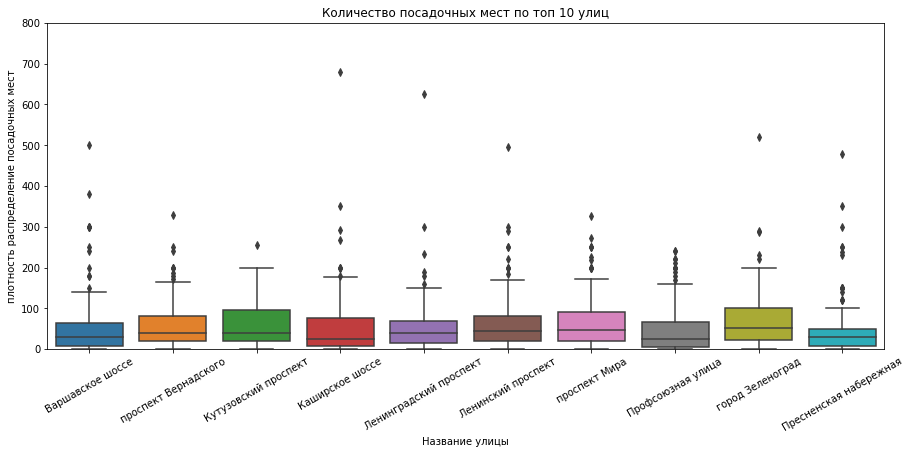

In [37]:
plt.figure(figsize=(15, 6))
sns.boxplot(x=top_10['street'], y=top_10['number'])
plt.xticks(rotation=30)
plt.xticks()
plt.xlabel('Название улицы')
plt.ylabel('плотность распределение посадочных мест')
plt.title('Количество посадочных мест по топ 10 улиц')
plt.ylim([0, 800])
plt.show()

<div style="background:#d4d6fa; color:#000; padding:10px">

на всех улицах где больше всего объектов плотность посадочных мест примерно одинаковая но есть и выбросы и довольно приличные

<div class = "alert alert-info" >
    
## общий вывод

<div style="background:#d4d6fa; color:#000; padding:10px">

Имея во внимании то, что мы открываем оригинальное кафе с роботами официантами, и можно сказать что это будет изюминка на торте, хорошо будет открыть кафе на таких улицах как  проспект Вернадского, Кутузовский проспект или на Каширское шоссе из за малой конкуренции по заведениям, и хорошей проходимости в данных местах

Посадочных мест установить в районе 50 так как в таких заведениях как кафе люди в основном долго не засиживаются
